# Machine Learning for stock prize prediction

## Import all the useful features

In [104]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

## Get the dataset from quandl, and print it

In [105]:
quandl.ApiConfig.api_key = "rykBzxUFUjQ3Shz-sz_s"
df = quandl.get('WIKI/GOOGL')
print(df)

                Open     High      Low     Close      Volume  Ex-Dividend  \
Date                                                                        
2004-08-19   100.010   104.06    95.96   100.335  44659000.0          0.0   
2004-08-20   101.010   109.08   100.50   108.310  22834300.0          0.0   
2004-08-23   110.760   113.48   109.05   109.400  18256100.0          0.0   
2004-08-24   111.240   111.60   103.57   104.870  15247300.0          0.0   
2004-08-25   104.760   108.00   103.88   106.000   9188600.0          0.0   
2004-08-26   104.950   107.95   104.66   107.910   7094800.0          0.0   
2004-08-27   108.100   108.62   105.69   106.150   6211700.0          0.0   
2004-08-30   105.280   105.49   102.01   102.010   5196700.0          0.0   
2004-08-31   102.320   103.71   102.16   102.370   4917800.0          0.0   
2004-09-01   102.700   102.97    99.67   100.250   9138200.0          0.0   
2004-09-02    99.090   102.37    98.94   101.510  15118600.0          0.0   

### from here, you can see the data structure looks like this,
|Open$\space$|High$\space$|Low$\space$|Close$\space$|Volume$\space$|Ex-Dividend$\space$|Split Ratio$\space$|Adj.Open$\space$|Adj.High$\space$|Adj.Low$\space$|Adj.Close$\space$|Adj.Volume$\space$|

|Date|

[3424 rows x 12 columns]

## just print the head or tail, they will look like these

In [106]:
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [107]:
print(df.tail())

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.57  1108.70  1087.21  1094.00  1990515.0          0.0   
2018-03-22  1080.01  1083.92  1049.64  1053.15  3418154.0          0.0   
2018-03-23  1051.37  1066.78  1024.87  1026.55  2413517.0          0.0   
2018-03-26  1050.60  1059.27  1010.58  1054.09  3272409.0          0.0   
2018-03-27  1063.90  1064.54   997.62  1006.94  2940957.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.57    1108.70   1087.21     1094.00   
2018-03-22          1.0    1080.01    1083.92   1049.64     1053.15   
2018-03-23          1.0    1051.37    1066.78   1024.87     1026.55   
2018-03-26          1.0    1050.60    1059.27   1010.58     1054.09   
2018-03-27          1.0    1063.90    1064.54    997.62

## Now rearrange the data, eliminate the useless columns

In [108]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [109]:
print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


## Setup new useful variables & rearrange the data structure again

In [110]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100.0
print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0   
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0   
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0   
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0   
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0   

              HL_PCT  PCT_change  
Date                              
2004-08-19  3.712563    0.324968  
2004-08-20  0.710922    7.227007  
2004-08-23  3.729433   -1.227880  
2004-08-24  6.417469   -5.726357  
2004-08-25  1.886792    1.183658  


In [111]:
df = df [['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


## Choose 'Adj.Close' as the forecast target

In [112]:
forecast_col = 'Adj. Close'

## Take 1% of the data set as the test set, 99% as the training set


In [113]:
forecast_out = int(math.ceil(0.01*len(df)))
print(len(df),forecast_out) 

3424 35


## Replace the non-number NaN with -9999 (actually NaNdoes not exist)
## You can see it at the tail

In [114]:
df.fillna(-9999, inplace = True) 
print(df.head())
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0
            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2018-03-21     1094.00  1.343693    0.130884    1990515.0
2018-03-22     1053.15  2.921711   -2.487014    3418154.0
2018-03-23     1026.55  3.918952   -2.360729    2413517.0
2018-03-26     1054.09  0.491419    0.332191    3272409.0
2018-03-27     1006.94  5.720301   -5.353887    2940957.0


## Create the new column 'label', shift the rows from the end, those unfilled numbers become NaN

In [115]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df['label']) 

Date
2004-08-19    69.078238
2004-08-20    67.839414
2004-08-23    68.912727
2004-08-24    70.668146
2004-08-25    71.219849
2004-08-26    72.278116
2004-08-27    74.810934
2004-08-30    74.199045
2004-08-31    70.462511
2004-09-01    74.921275
2004-09-02    86.481962
2004-09-03    93.990139
2004-09-07    91.181468
2004-09-08    93.272925
2004-09-09    96.949273
2004-09-10    95.615155
2004-09-13    98.318500
2004-09-14    97.736704
2004-09-15    96.131750
2004-09-16    92.635958
2004-09-17    84.937193
2004-09-20    86.542147
2004-09-21    84.611187
2004-09-22    84.189886
2004-09-23    91.793357
2004-09-24    91.281778
2004-09-27    92.721222
2004-09-28    86.539640
2004-09-29    86.517070
2004-09-30    84.029391
                ...    
2018-02-13          NaN
2018-02-14          NaN
2018-02-15          NaN
2018-02-16          NaN
2018-02-20          NaN
2018-02-21          NaN
2018-02-22          NaN
2018-02-23          NaN
2018-02-26          NaN
2018-02-27          NaN
2018-02-28 

In [116]:
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume  label
Date                                                            
2018-03-21     1094.00  1.343693    0.130884    1990515.0    NaN
2018-03-22     1053.15  2.921711   -2.487014    3418154.0    NaN
2018-03-23     1026.55  3.918952   -2.360729    2413517.0    NaN
2018-03-26     1054.09  0.491419    0.332191    3272409.0    NaN
2018-03-27     1006.94  5.720301   -5.353887    2940957.0    NaN


# Create Arrays for data training and testing
## Drop the label, and use the first 4 columns for training and testing

In [117]:
 print(df.drop(['label'],1))

             Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                      
2004-08-19    50.322842  3.712563    0.324968   44659000.0
2004-08-20    54.322689  0.710922    7.227007   22834300.0
2004-08-23    54.869377  3.729433   -1.227880   18256100.0
2004-08-24    52.597363  6.417469   -5.726357   15247300.0
2004-08-25    53.164113  1.886792    1.183658    9188600.0
2004-08-26    54.122070  0.037068    2.820391    7094800.0
2004-08-27    53.239345  2.326896   -1.803885    6211700.0
2004-08-30    51.162935  3.411430   -3.106003    5196700.0
2004-08-31    51.343492  1.308977    0.048866    4917800.0
2004-09-01    50.280210  2.713217   -2.385589    9138200.0
2004-09-02    50.912161  0.847207    2.442224   15118600.0
2004-09-03    50.159839  1.729827   -0.931154    5152400.0
2004-09-07    50.947269  0.413467    0.564301    5847500.0
2004-09-08    51.308384  0.713587    1.548541    4985600.0
2004-09-09    51.313400  0.390969   -0.185366    4061700

In [118]:
X = np.array(df.drop(['label'],1))
print(X)

[[ 5.03228418e+01  3.71256291e+00  3.24967503e-01  4.46590000e+07]
 [ 5.43226889e+01  7.10922353e-01  7.22700723e+00  2.28343000e+07]
 [ 5.48693765e+01  3.72943327e+00 -1.22788010e+00  1.82561000e+07]
 ...
 [ 1.02655000e+03  3.91895183e+00 -2.36072933e+00  2.41351700e+06]
 [ 1.05409000e+03  4.91419139e-01  3.32191129e-01  3.27240900e+06]
 [ 1.00694000e+03  5.72030111e+00 -5.35388664e+00  2.94095700e+06]]


# Preprocessing: Normalization and Standardization
## if the data is too spread out, it helps to eliminate the sparsity.

In [119]:
X = preprocessing.scale(X)
print(X)

[[-1.39187095  2.33516806  0.23254018  4.46712802]
 [-1.37635178 -0.31135438  4.81828847  1.8207495 ]
 [-1.37423066  2.35004252 -0.79917922  1.26561472]
 ...
 [ 2.39583323  2.51713951 -1.55184968 -0.65539548]
 [ 2.50268682 -0.50488861  0.23733959 -0.55124957]
 [ 2.31974758  4.10537475 -3.54051775 -0.59144015]]


# The first (3424 - 35) = 3389 rows for training
# the Last 35 rows for testing 

In [120]:
X_lately = X[-forecast_out:] 
print(X_lately)

[[ 2.62040424 -0.69832022  3.25839716 -0.49545744]
 [ 2.50780834  1.66160318 -1.79354019 -0.6394908 ]
 [ 2.31454846  4.17610055 -3.38541422 -0.57613569]
 [ 2.46132664 -0.23766898  1.15324503 -0.41015315]
 [ 2.50451039 -0.01764958 -0.11604074 -0.60898579]
 [ 2.50288082 -0.34599149  0.27859553 -0.75717739]
 [ 2.57489253 -0.71049234  1.17488957 -0.70190181]
 [ 2.64729224 -0.71680879  0.50169569 -0.72903566]
 [ 2.66335519  0.09281915  0.14545442 -0.70894085]
 [ 2.69474392  0.07647313  0.67510086 -0.74841251]
 [ 2.73416412  0.8390688   0.2951878  -0.70256205]
 [ 2.71922635  0.29789985 -0.53369123 -0.77997427]
 [ 2.78980248 -0.8670452   0.57670541 -0.79835378]
 [ 2.85036837 -0.89962333  0.71164132 -0.76748452]
 [ 2.7487527   1.17156108 -1.50481437 -0.69403423]
 [ 2.6960243   0.95712701 -1.05399713 -0.65327277]
 [ 2.5698874   2.34201725 -2.26663627 -0.61255097]
 [ 2.61927906 -0.71452134  1.65946178 -0.64392126]
 [ 2.66048404 -0.42111838  1.04146504 -0.77436569]
 [ 2.68430688 -0.55935131 -0.05

In [121]:
X = X[:-forecast_out]
print(X)
#print(size(X))

[[-1.39187095  2.33516806  0.23254018  4.46712802]
 [-1.37635178 -0.31135438  4.81828847  1.8207495 ]
 [-1.37423066  2.35004252 -0.79917922  1.26561472]
 ...
 [ 2.99737935 -0.50090092  0.33301614 -0.61156746]
 [ 2.7553098   0.01505419 -0.46778619 -0.24489949]
 [ 2.55960556  2.87565464 -1.90605746 -0.49425191]]


In [122]:
df.dropna(inplace=True)
y = np.array(df['label'])
print(y)

[  69.0782379    67.83941377   68.91272699 ... 1026.55       1054.09
 1006.94      ]


In [123]:
print(len(X),len(y))

3389 3389


In [124]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(len(y_train),len(y_test))

[[-0.32756707  0.79726289 -0.26344197 -0.50011695]
 [-0.51875938  1.48844734 -1.44738478  0.352835  ]
 [-0.60440186 -0.50168774  0.08247806 -0.52827262]
 ...
 [ 0.53322856 -0.27507279 -0.45415936 -0.74531175]
 [ 0.67775637 -0.79467912  1.05116855 -0.68002951]
 [ 0.95334861  2.16162942 -2.14317379 -0.44712354]]
[[-0.8164356   1.39050954 -1.28115749  1.91258889]
 [ 0.50028785 -0.29083001 -0.19633188 -0.71580298]
 [-0.53978178 -0.08745043 -0.44833056 -0.45631924]
 ...
 [-0.38437016 -0.04659112 -0.38702492 -0.00231206]
 [-1.22505201  0.81043015 -1.11709449  1.30776335]
 [-0.52340054  0.98046381 -0.31895831 -0.27476245]]
[367.78531804 264.56669203 244.6702737  ... 550.03       547.73
 652.47      ]
[ 183.46634303  541.31        284.6236058   285.38094363  590.62
  599.02        710.47        198.01124173  259.84712318  271.88929621
  196.05520363  442.52102     170.75209536  407.46781411   90.72004409
  804.57        198.86387373  253.28185683  937.82        236.46996011
  260.47907395  546

In [127]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately) # prediction per day

print(forecast_set, accuracy, forecast_out) #next stock price  ##

[1103.59970455 1073.16032697 1019.42646581 1062.11181037 1074.12121621
 1074.47230799 1093.24712295 1112.46465863 1115.47742229 1123.5653713
 1132.66647526 1130.19350371 1149.96408086 1165.63393722 1136.67854012
 1122.97896756 1088.38157883 1104.43529973 1115.34305627 1122.3133186
 1136.31289101 1150.96113984 1182.55028627 1186.75190323 1158.10912687
 1169.66263868 1171.47441942 1154.00139183 1119.39760206 1116.02469114
 1113.73429911 1070.54089499 1042.62601846 1074.08856273 1020.99951974] 0.9780196111239264 35


In [128]:
df['Forecast'] = np.nan
# Find the last date
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    # referencing the location of the index
    # replace the date into the arrays



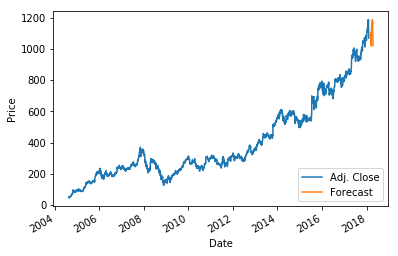

In [129]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
